# Classification d'assertions selons leur valeurs de véracité

In [27]:
# Importation des différentes librairies utiles pour le notebook

!pip install langdetect
!pip install contractions

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Lien avec Google Drive

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

my_local_drive = '/content/gdrive/My Drive/Machine Learning/'
sys.path.append(my_local_drive)
%cd $my_local_drive
%ls -l

from MyNLPUtilities import *

df = pd.read_csv('output_400-700.csv', sep=',')
display(df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Machine Learning
total 7842
-rw------- 1 root root   83237 May 12 09:44 'Copie de Projet_Machine_Learning_test.ipynb'
-rw------- 1 root root    3891 May 11 22:03  MyNLPUtilities.py
-rw------- 1 root root 2133202 May 12 08:33  output_1600-1600.csv
-rw------- 1 root root 3450887 May 11 11:27  output_2600-2600.csv
-rw------- 1 root root  538654 May 11 11:24  output_400-400.csv
-rw------- 1 root root     143 May 11 22:07  output_400-400.gsheet
-rw------- 1 root root  739465 May 12 09:48  output_400-700.csv
-rw------- 1 root root 1073392 May 11 11:26  output_800-800.csv
drwx------ 2 root root    4096 May 12 08:23  __pycache__/


,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/b0...,GOP presidential candidate Ted Cruz ran a 'Net...,Unknown,1,False,Unknown,Ted Cruz Doesn’t Want to ‘Netflix and Chill’ w...,"Netflix,Netflix and Chill,Republican,Ted Cruz,...","Netflix and Chill,Ted Cruz","politics, ted cruz",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/ted-cruz-net...,English
1,http://data.gesis.org/claimskg/claim_review/03...,A woman managed to call 911 during a domestic ...,Unknown,1,False,Unknown,"In Case of Intruder, Should You Ask 911 for a ...","BuzzFeed,Reddit,Reddit gold,Super Bowl,Super B...",NaN,"911 calls, domestic violence",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/case-intrude...,English
2,http://data.gesis.org/claimskg/claim_review/e1...,The California Department of Public Health has...,Unknown,1,False,Unknown,Measles Parties,"ABCNews.com,California Department of Public He...","California Department of Public Health,measles",ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/party-scarred/,English
3,http://data.gesis.org/claimskg/claim_review/3c...,Michelle Obama gorged herself on an expensive ...,Unknown,1,False,Unknown,Michelle Obama and Room Service,"2008. Democratic presidential nominee,Alfred...","Michelle Obama,Waldorf-Astoria hotel,room service","ASP Article, barack obama",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/room-for-error/,English
4,http://data.gesis.org/claimskg/claim_review/b4...,A child injured his arm through extended weari...,Unknown,3,True,Unknown,Silly Bandz Danger,"Associated Press,Bonkers,Facebook,Herendeen,Ne...",Silly Bandz,"ASP Article, Parental Nightmares",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/wrist-risk/,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,http://data.gesis.org/claimskg/claim_review/f1...,The Joint Chiefs of Staff sent a letter to the...,Unknown,3,True,Unknown,Joint Chiefs of Staff React to Editorial Cartoon,"Bush administration,Donald Rumsfeld,Iraq,Joint...","Joint Chiefs of Staff,Washington Post,editoria...",ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/24-star-letter/,English
1096,http://data.gesis.org/claimskg/claim_review/8c...,A coloring crayon can be used as a candle for ...,Unknown,3,True,Unknown,Can a Crayon Be Used as a Candle?,"Crayola,Pinterest,paraffin wax,sardine,the Int...",NaN,Household Hints,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/crayon-candle/,English
1097,http://data.gesis.org/claimskg/claim_review/c4...,The U.S. government 'subsidizes' medications f...,Unknown,3,True,Unknown,Does the U.S. Government Subsidize Viagra?,"Cialis,Defense Health Agency,Donald Trump,Inte...",erectile dysfunction,NaN,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/us-governmen...,English
1098,http://data.gesis.org/claimskg/claim_review/04...,Verizon Wireless limited the Santa Clara Count...,Unknown,3,True,Unknown,Did Verizon Wireless Throttle a Fire Departmen...,"California Public Utilities Commission,Distric...","Santa Clara County Fire Department,Verizon Wir...",NaN,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/verizon-fire...,English


# Analyse du jeu de données

In [29]:
import plotly.express as px
from sklearn.decomposition import PCA


print ("Nombre d'occurrences par classe : \n", df['ratingName'].value_counts())
print ("Shape: " + str(df.shape))

Nombre d'occurrences par classe : 
 False    700
True     400
Name: ratingName, dtype: int64
Shape: (1100, 14)


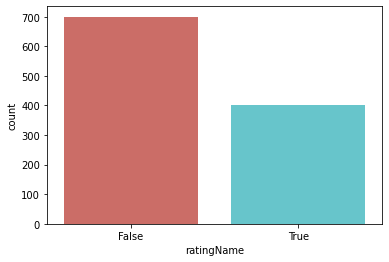

In [30]:
def create_distribution(dataFile):
    return sb.countplot(x='ratingName', data=dataFile, palette='hls')
create_distribution(df)

In [31]:
display(df.head())

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/b0...,GOP presidential candidate Ted Cruz ran a 'Net...,Unknown,1,False,Unknown,Ted Cruz Doesn’t Want to ‘Netflix and Chill’ w...,"Netflix,Netflix and Chill,Republican,Ted Cruz,...","Netflix and Chill,Ted Cruz","politics, ted cruz",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/ted-cruz-net...,English
1,http://data.gesis.org/claimskg/claim_review/03...,A woman managed to call 911 during a domestic ...,Unknown,1,False,Unknown,"In Case of Intruder, Should You Ask 911 for a ...","BuzzFeed,Reddit,Reddit gold,Super Bowl,Super B...",NaN,"911 calls, domestic violence",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/case-intrude...,English
2,http://data.gesis.org/claimskg/claim_review/e1...,The California Department of Public Health has...,Unknown,1,False,Unknown,Measles Parties,"ABCNews.com,California Department of Public He...","California Department of Public Health,measles",ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/party-scarred/,English
3,http://data.gesis.org/claimskg/claim_review/3c...,Michelle Obama gorged herself on an expensive ...,Unknown,1,False,Unknown,Michelle Obama and Room Service,"2008. Democratic presidential nominee,Alfred...","Michelle Obama,Waldorf-Astoria hotel,room service","ASP Article, barack obama",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/room-for-error/,English
4,http://data.gesis.org/claimskg/claim_review/b4...,A child injured his arm through extended weari...,Unknown,3,True,Unknown,Silly Bandz Danger,"Associated Press,Bonkers,Facebook,Herendeen,Ne...",Silly Bandz,"ASP Article, Parental Nightmares",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/wrist-risk/,English


# Création jeu de donnée

In [32]:
#Définition variables apprentissage et de prédiction


# Exctraction des variables
Xsource = df.source
Xtext = df.text
Xheadline = df.headline
Xauthor = df.author
Xentities = df.named_entities_claim
Xkeywords = df.keywords

#concaténation de texts à traiter
X = Xtext + Xheadline + Xsource + Xauthor + Xentities + Xkeywords

#variable de prédiction
y = df['ratingName']


#Normalisation du datatext

In [33]:
#Definition de la fonction MyCleanText pour lr pré traitement du text
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def MyCleanText(X,
 lowercase=True, # mettre en minuscule
 removestopwords=False, # supprimer les stopwords
 removedigit=False, # supprimer les nombres
 getstemmer=False, # conserver la racine des termes
 getlemmatisation=False # lematisation des termes
 ):

 sentence=str(X)
 # suppression des caractères spéciaux
 sentence = re.sub(r'[^\w\s]',' ', sentence)
 # suppression de tous les caractères uniques
 sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
 # substitution des espaces multiples par un seul espace
 sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
 # decoupage en mots
 tokens = word_tokenize(sentence)
 if lowercase:
  tokens = [token.lower() for token in tokens]

 # suppression ponctuation
 table = str.maketrans('', '', string.punctuation)
 words = [token.translate(table) for token in tokens]
 # suppression des tokens non alphabetique ou numerique
 words = [word for word in words if word.isalnum()]

 # suppression des tokens numerique
 if removedigit:
  words = [word for word in words if not word.isdigit()]

 # suppression des stopwords
 if removestopwords:
  words = [word for word in words if not word in stop_words]

 # lemmatisation
 if getlemmatisation:
  lemmatizer=WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word)for word in words]

 # racinisation
 if getstemmer:
  ps = PorterStemmer()
  words=[ps.stem(word) for word in words]
 
 sentence= ' '.join(words)
 return sentence


#Definir la classe TextNormalizer qui effectue les prétraitements sur les données
from sklearn.base import BaseEstimator, TransformerMixin
class TextNormalizer(BaseEstimator, TransformerMixin):
 def __init__(self,
 removestopwords=False, # suppression des stopwords
 lowercase=False,# passage en minuscule
 removedigit=False, # supprimer les nombres
 getstemmer=False,# racinisation des termes
 getlemmatisation=False # lemmatisation des termes
 ):
   self.lowercase=lowercase
   self.getstemmer=getstemmer
   self.removestopwords=removestopwords
   self.getlemmatisation=getlemmatisation
   self.removedigit=removedigit

 # Nettoyage du texte
 def transform(self, X, **transform_params):
  X=X.copy() # pour conserver le fichier d'origine
  return [MyCleanText(text,lowercase=self.lowercase, getstemmer=self.getstemmer, removestopwords=self.removestopwords, getlemmatisation=self.getlemmatisation, removedigit=self.removedigit) for text in X]

 def fit(self, X, y=None, **fit_params):
   return self

 def fit_transform(self, X, y=None, **fit_params):
   return self.fit(X).transform(X)

 def get_params(self, deep=True):
   return { 'lowercase':self.lowercase, 'getstemmer':self.getstemmer, 'removestopwords':self.removestopwords, 'getlemmatisation':self.getlemmatisation, 'removedigit':self.removedigit }

 def set_params (self, **parameters):
   for parameter, value in parameters.items():
    setattr(self,parameter,value)
   return self 



# création d'un objet de la classe TextNormalizer
text_normalizer = TextNormalizer(lowercase=True)


# application du fit.transform pour appliquer les pré traitements
X_cleaned = text_normalizer.fit_transform(X)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Création d'un jeu d'apprentissage et de test

In [34]:
# Transformation du texte en données utilisables par les classifieurs
tf = TfidfVectorizer()
X_transformed = tf.fit_transform(X_cleaned).toarray()

# Séparation du jeu de données    80%-20%
trainsize = 0.8
testsize = 0.2
seed = 30


X_train,X_test,y_train,y_test=train_test_split(X_transformed, y, train_size=trainsize, random_state=seed, test_size=testsize)

# Comparaison de Classifieurs

1. Accuracy


In [35]:
models = []
models.append(('MultinomialNB',MultinomialNB()))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = 'accuracy'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)
  # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

#Affichage résultats

print ('Tous les résultats : \n')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean), 
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

Evaluation de  MultinomialNB
Evaluation de  LR
Evaluation de  KNN
Evaluation de  CART
Evaluation de  RF
Evaluation de  SVM
Tous les résultats : 

Classifier :  KNN  accuracy : 0.647  (0.074)  en 1.818   s
Classifier :  RF  accuracy : 0.644  (0.052)  en 42.390   s
Classifier :  LR  accuracy : 0.637  (0.044)  en 8.486   s
Classifier :  SVM  accuracy : 0.635  (0.050)  en 113.912   s
Classifier :  MultinomialNB  accuracy : 0.635  (0.047)  en 0.974   s
Classifier :  CART  accuracy : 0.589  (0.047)  en 24.156   s

Le meilleur resultat : 
Classifier :  KNN  accuracy : 0.647  (0.074)  en 1.818   s



[Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

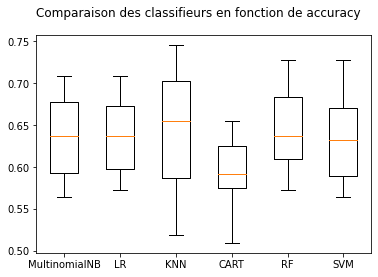

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

2. Recall

In [37]:
score = 'recall'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)
  # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

#Affichage résultats

print ('Tous les résultats : \n')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean), 
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

Evaluation de  MultinomialNB
Evaluation de  LR
Evaluation de  KNN
Evaluation de  CART
Evaluation de  RF
Evaluation de  SVM
Tous les résultats : 

Classifier :  KNN  recall : 0.366  (0.090)  en 1.834   s
Classifier :  CART  recall : 0.336  (0.092)  en 24.939   s
Classifier :  RF  recall : 0.099  (0.057)  en 45.654   s
Classifier :  LR  recall : 0.041  (0.030)  en 8.411   s
Classifier :  SVM  recall : 0.011  (0.017)  en 104.415   s
Classifier :  MultinomialNB  recall : 0.000  (0.000)  en 0.817   s

Le meilleur resultat : 
Classifier :  KNN  recall : 0.366  (0.090)  en 1.834   s



[Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

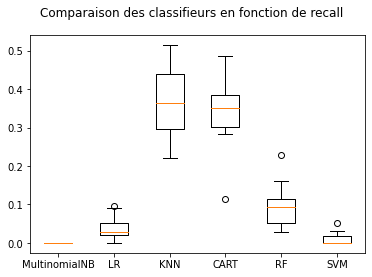

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)